In [10]:
import keras 
import tensorflow as tf 
import numpy as np 
import pandas as pd 

from sklearn.model_selection import train_test_split

df = pd.read_csv("Assignment.csv")
#df.head()

#need to find out which features to removes

features =df[]

first_model = keras.models.Seqquential([
    keras.layers.Dense(units = 64, activation = "relu", input_shape = [784])
])

,duree,nbrtotc,chargtot
count,163657.000000,163657.000000,1.636570e+05
mean,0.889786,0.123979,2.011004e+02
std,0.244141,0.367597,5.885387e+03
min,0.002740,0.000000,0.000000e+00
25%,1.000000,0.000000,0.000000e+00
50%,1.000000,0.000000,0.000000e+00
75%,1.000000,0.000000,0.000000e+00
max,1.008219,5.000000,1.989568e+06


In [1]:
import keras 
import tensorflow as tf 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

df = pd.read_csv("Assignment.csv")

df.head()

,AGEPH,CODPOSS,duree,lnexpo,nbrtotc,nbrtotan,chargtot,agecar,sexp,fuelc,split,usec,fleetc,sportc,coverp,powerc
0,64,1000,1.000000,0.000000,0,0.000000,0.000000,2-5,Female,Petrol,Once,Private,No,No,MTPL+,66-110
1,28,1000,0.046575,-3.066684,1,21.470588,155.974606,6-10,Female,Petrol,Twice,Private,No,No,MTPL,66-110
2,58,1000,0.402740,-0.909465,0,0.000000,0.000000,>10,Female,Petrol,Thrice,Private,No,No,MTPL,<66
3,37,1030,0.169863,-1.772763,0,0.000000,0.000000,2-5,Female,Petrol,Once,Professional,No,No,MTPL+++,66-110
4,29,1030,1.000000,0.000000,0,0.000000,0.000000,6-10,Female,Petrol,Once,Private,No,No,MTPL+,<66


Epoch 1/10
3683/3683 [==============================] - 10s 3ms/step - loss: 64545.1406 - mean_absolute_error: 24.1347 - val_loss: 106544.1641 - val_mean_absolute_error: 73.7416
Epoch 2/10
3683/3683 [==============================] - 9s 3ms/step - loss: 688077.8750 - mean_absolute_error: 42.5317 - val_loss: 458.1844 - val_mean_absolute_error: 2.6668
Epoch 3/10
3683/3683 [==============================] - 9s 3ms/step - loss: 21641.3379 - mean_absolute_error: 11.2420 - val_loss: 2550.8269 - val_mean_absolute_error: 14.2663
Epoch 4/10
3683/3683 [==============================] - 10s 3ms/step - loss: 274785.0312 - mean_absolute_error: 11.8556 - val_loss: 46349.5938 - val_mean_absolute_error: 11.4472
Epoch 5/10
3683/3683 [==============================] - 10s 3ms/step - loss: 581612.8750 - mean_absolute_error: 16.2867 - val_loss: 1242.7188 - val_mean_absolute_error: 5.9208
Epoch 6/10
3683/3683 [==============================] - 10s 3ms/step - loss: 74150.8906 - mean_absolute_error: 16.7673 

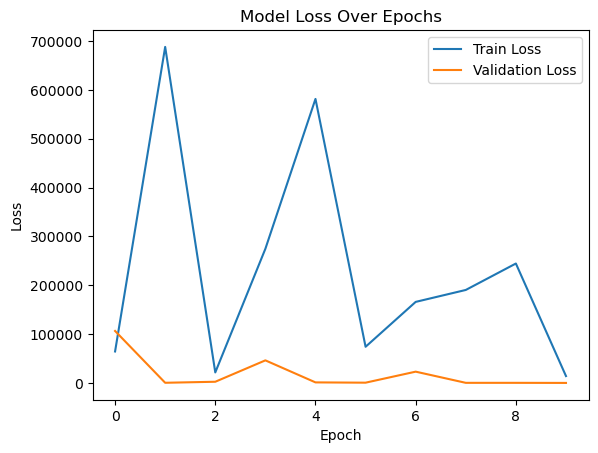

In [8]:
import keras 
import tensorflow as tf 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

df = pd.read_csv("Assignment.csv")

#do one hot encoding for catagorical features 
df_encoded = pd.get_dummies(df, columns = ['agecar', 'sexp', 'fuelc', 'split', 'usec', 'fleetc','sportc', 'coverp', 'powerc'])

df_features = []

for col in df_encoded.columns:
    if col != "nbrtotan":
        df_features.append(col)


model = keras.models.Sequential([
    keras.layers.Dense(units = 64, activation = 'relu', input_shape=(len(df_features),)),
    keras.layers.Dense(32, activation = 'relu' ),
    keras.layers.Dense(1, activation = 'linear')
])

model.compile(optimizer = 'adam',
              loss = 'mse',
              metrics = ['mean_absolute_error']
)

#Prepare features and labels 
X = df_encoded[df_features]
y = df_encoded['nbrtotan']

#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()



In [7]:
predictions = model.predict(X_test)

import matplotlib.pyplot as plt

# Flatten predictions if necessary
predictions = predictions.flatten()

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")

1023/1023 [==============================] - 2s 2ms/step
Mean Absolute Error (MAE): 0.27469037144008907
Mean Squared Error (MSE): 0.9500314298160848
R-squared: -4.332572055831818e-05
